In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick

%matplotlib inline

In [2]:
color_map = {'Residential':'red', 'Commercial':'cyan','Industrial':'black', 'Agricultural':'green', 'Street/Outdoor':'grey','Unmapped':'grey'}

all_utils = pd.read_csv('../datafiles/out_ferc1__yearly_sales_by_rate_schedules_sched304.csv')
CA_IOUs = all_utils[(all_utils['utility_name_ferc1'].str.contains("PACIFIC GAS|Southern California|San Diego"))&(all_utils['billing_status']=='billed')]
CA_IOUs = CA_IOUs[~CA_IOUs['rate_schedule_description'].str.contains("total",na=False)]
CA_IOUs = CA_IOUs[CA_IOUs['rate_schedule_description'].notna()]
CA_IOUs

,rowid,utility_id_ferc1,utility_id_ferc1_label,utility_id_pudl,utility_id_pudl_label,utility_name_ferc1,report_year,rate_schedule_type,billing_status,rate_schedule_description,sales_mwh,dollar_value,avg_customers_per_month,kwh_per_customer,revenue_per_kwh,record_id
289,270185,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,residential,billed,TOU-D-PRIME/BUND/NEMA2.0/SEP,0.0,20.0,0.0,NaN,NaN,sales_of_electricity_by_rate_schedules_account...
290,270186,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,residential,billed,TOU-D-PRIME/CCA/NEM2.0,9338.0,1594665.0,2030.0,4600.000000,0.1708,sales_of_electricity_by_rate_schedules_account...
291,270187,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,residential,billed,TOU-D-PRIME/CCA/NEM1.0/SEP,37.0,1994.0,6.0,6166.666504,0.0539,sales_of_electricity_by_rate_schedules_account...
292,270188,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,residential,billed,TOU-D-PRIME/CCA/NEM1.0,21044.0,3207591.0,1875.0,11223.466797,0.1524,sales_of_electricity_by_rate_schedules_account...
293,270189,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,residential,billed,TOU-D-PRIME/BUND/NEMPS1.0,2090.0,469069.0,244.0,8565.574219,0.2244,sales_of_electricity_by_rate_schedules_account...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9353,287219,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,interdepartmental,billed,GS-1/BUND,28.0,6791.0,6.0,4666.666504,0.2425,sales_of_electricity_by_rate_schedules_account...
9354,287220,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,interdepartmental,billed,PA-2/BUND,1218.0,195826.0,7.0,174000.000000,0.1608,sales_of_electricity_by_rate_schedules_account...
9355,287221,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,interdepartmental,billed,TOU-D-PRIME-SDP/BUND/NEM2.0,0.0,-17.0,0.0,NaN,NaN,sales_of_electricity_by_rate_schedules_account...
9356,287222,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,interdepartmental,billed,TOUD-4-9PM/BUND,1.0,227.0,1.0,1000.000000,0.2270,sales_of_electricity_by_rate_schedules_account...


In [3]:
total_cust = CA_IOUs[['utility_name_ferc1','avg_customers_per_month']].groupby('utility_name_ferc1').sum().reset_index().avg_customers_per_month.to_list()
pge_total = total_cust[0]
sce_total = total_cust[2]
sdge_total = total_cust[1]

In [47]:
IOUs_CAREFERA = CA_IOUs[CA_IOUs['rate_schedule_description'].str.contains('CARE|FERA',case=False)]
IOUs_CAREFERA_res = IOUs_CAREFERA[(IOUs_CAREFERA['rate_schedule_type']=='residential')]
IOUs_CAREFERA_res[['rate_schedule_description','utility_name_ferc1','avg_customers_per_month']].groupby('utility_name_ferc1').sum()

,rate_schedule_description,avg_customers_per_month
utility_name_ferc1,,
PACIFIC GAS AND ELECTRIC COMPANY,EL-TOUC Residential Care Time-of-Use ServiceEL...,1253091.0
Southern California Edison Company,TOU-D-T-CARE/BUND/NEM2.0TOU-D-T-CARE/BUND/NEM1...,1228057.0


In [219]:
SCE_res = CA_IOUs[CA_IOUs['utility_name_ferc1'].str.contains("Southern California")]
SCE_res = SCE_res[(SCE_res['rate_schedule_type']=='residential')]
SCE_res[['rate_schedule','CCA_or_bundled','NEM_option','sep']] = SCE_res['rate_schedule_description'].str.split('/',expand=True)

#SCE_res.loc[:,"CARE/FERA"] = "No"
#SCE_res.loc[:,"NEM"] = "No"
#SCE_res.loc[SCE_res['rate_schedule'].str.contains("CARE|FERA",case=False),"CARE/FERA"]='Yes'
#SCE_res.loc[SCE_res['rate_schedule_description'].str.contains("NEM",case=False),"NEM"]='Yes'

SCE_res['rate_schedule'] = SCE_res['rate_schedule'].str.replace(r'omestic', '', regex=True, case=False)
SCE_res['rate_schedule'] = SCE_res['rate_schedule'].str.replace(r'-care', '', regex=True, case=False)
SCE_res['rate_schedule'] = SCE_res['rate_schedule'].str.replace(r'-fera', '', regex=True, case=False)                                                       
SCE_res = SCE_res.groupby('rate_schedule').sum().reset_index()
#SCE_res = SCE_res.groupby(['rate_schedule','CARE/FERA','NEM']).agg({'avg_customers_per_month':'sum'}).reset_index()
#CCA_or_bundled and NEM are also options
#SCE_res.to_csv('unclipped SCE.csv')
#SCE_allcumsum = SCE_res['avg_customers_per_month'].cumsum()

SCE_res = SCE_res.astype({"rate_schedule": str, "avg_customers_per_month": float}).sort_values(by='avg_customers_per_month')
SCE_res = SCE_res[SCE_res['avg_customers_per_month'] > 0.001*SCE_res['avg_customers_per_month'].sum()]
SCE_res['pct of total'] = SCE_res['avg_customers_per_month']/sce_total

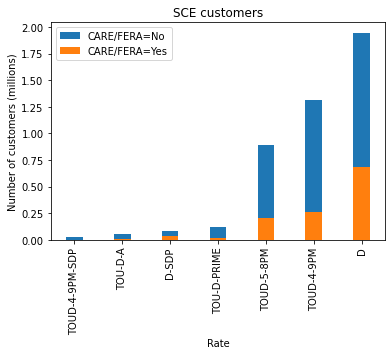

In [185]:
# Plotting the stacked bar chart
fig, ax = plt.subplots()

grouped = SCE_res.sort_values(by='avg_customers_per_month').groupby(["rate_schedule", "CARE/FERA"])["avg_customers_per_month"].sum().unstack(fill_value=0)
grouped.sort_values(by='No',inplace=True)
grouped_NEM = SCE_res.loc[SCE_res['NEM']=="Yes"].groupby(["rate_schedule", "CARE/FERA"])["avg_customers_per_month"].sum().unstack(fill_value=0)
grouped_NEM.sort_values(by='rate_schedule',inplace=True)
grouped_merged = pd.merge(grouped,grouped_NEM,on='rate_schedule').rename({'No_y':'NoCARE_NEM','Yes_y':'CARE_NEM'})
# Get the number of categories (Yes and No) for x-axis ticks
num_categories = len(grouped_merged.columns)

# Set the bar width
bar_width = 0.35

# Set the position of the bars on the x-axis
bar_positions = range(len(grouped_merged))

no_bars = ax.bar(bar_positions, grouped_merged["No_x"]/1e6, bar_width, bottom=grouped_merged["Yes_x"]/1e6, label="CARE/FERA=No")
yes_bars = ax.bar(bar_positions, grouped_merged["Yes_x"]/1e6, bar_width, label="CARE/FERA=Yes")

#no_nem_bars = ax.bar(np.array(bar_positions)-0.01, grouped_merged["No_y"]/1e6, bar_width, bottom=grouped_merged["Yes_x"]/1e6,color='none', edgecolor='black', hatch='//', linewidth=1)
#yes_nem_bars = ax.bar(np.array(bar_positions)-0.01, grouped_merged["Yes_y"]/1e6, bar_width,color='none', edgecolor='black', hatch='//', linewidth=1)
#ax.bar(np.array(bar_positions)-0.01, grouped_merged["Yes_y"]/1e6, bar_width,color='none', edgecolor='black', hatch='//', linewidth=1,label='NEM')

# Add labels, title, and legend
ax.set_xlabel("Rate")
ax.set_ylabel("Number of customers (millions)")
ax.set_title("SCE customers")
ax.set_xticks(bar_positions)
ax.set_xticklabels(grouped_merged.index)
ax.legend()

# Show plot
plt.xticks(rotation=90)
plt.show()

In [210]:
PGE_res = CA_IOUs[CA_IOUs['utility_name_ferc1'].str.contains("PACIFIC GAS")]
PGE_res = PGE_res[(PGE_res['rate_schedule_type']=='residential')]
PGE_res['rate_schedule'] = PGE_res['rate_schedule_description'].str.split(' ',expand=True)[0]

PGE_res.loc[:,"CARE/FERA"] = "No"
PGE_res.loc[:,"NEM"] = "No"
PGE_res.loc[PGE_res['rate_schedule_description'].str.contains("CARE|FERA",case=False),"CARE/FERA"]='Yes'
PGE_res.loc[PGE_res['rate_schedule_description'].str.contains("NEM",case=False),"NEM"]='Yes'

PGE_res['rate_schedule'] = PGE_res['rate_schedule'].str.replace('EL', 'E')
PGE_res['rate_schedule'] = PGE_res['rate_schedule'].str.replace('-', '')


PGE_res['rate_schedule'] = PGE_res['rate_schedule'].str.replace(r'omestic', '', regex=True, case=False)
PGE_res['rate_schedule'] = PGE_res['rate_schedule'].str.replace(r'-care', '', regex=True, case=False)
PGE_res['rate_schedule'] = PGE_res['rate_schedule'].str.replace(r'-fera', '', regex=True, case=False)                                                         

PGE_res = PGE_res.groupby('rate_schedule').sum().reset_index()
PGE_res = PGE_res.astype({"rate_schedule": str, "avg_customers_per_month": float}).sort_values(by='avg_customers_per_month')
PGE_res = PGE_res[PGE_res['avg_customers_per_month'] > 0.001*PGE_res['avg_customers_per_month'].sum()]
PGE_res['pct of total'] = PGE_res['avg_customers_per_month']/pge_total

In [211]:
SDGE_res = CA_IOUs[CA_IOUs['utility_name_ferc1'].str.contains("San Diego")]
SDGE_res = SDGE_res[(SDGE_res['rate_schedule_type']=='residential')]
SDGE_res['rate_schedule'] = SDGE_res['rate_schedule_description'].str.split(' ',expand=True)[0]
SDGE_res = SDGE_res.groupby('rate_schedule').sum().reset_index()
SDGE_res = SDGE_res.astype({"rate_schedule": str, "avg_customers_per_month": float}).sort_values(by='avg_customers_per_month')
SDGE_res = SDGE_res[SDGE_res['avg_customers_per_month'] > 0.001*SDGE_res['avg_customers_per_month'].sum()]
SDGE_res['pct of total'] = SDGE_res['avg_customers_per_month']/sdge_total

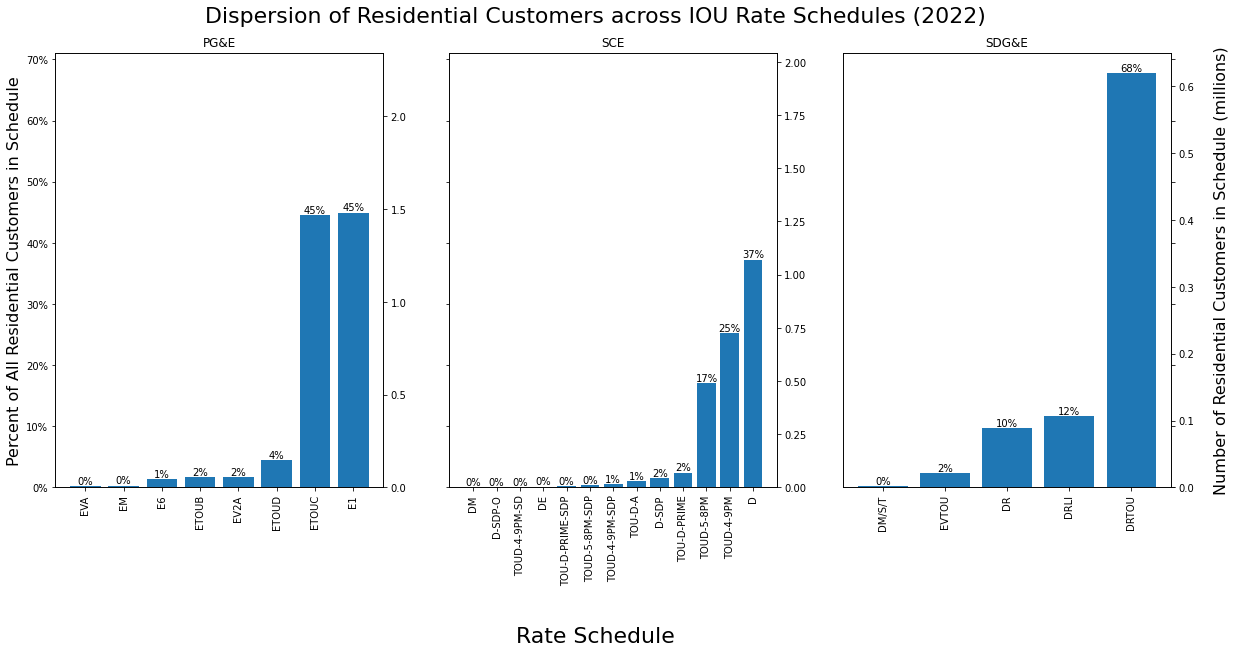

In [241]:
dfs = [PGE_res,SCE_res,SDGE_res]
df_names=["PG&E","SCE","SDG&E"]
axtwins=[]
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(20,8),sharey=True,facecolor=None)
for idx,df in enumerate(dfs):
    df =  df.sort_values(by='pct of total')
    bars = axs[idx].bar(x=df['rate_schedule'],height=df['pct of total'])
    axs[idx].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    axs[idx].bar_label(axs[idx].containers[0],fmt='{:.0%}',fontsize=10)
    axs[idx].tick_params(axis='x', labelrotation=90)
    axs[idx].set_title(df_names[idx])
    axtwins.append(axs[idx].twinx())
    axtwins[idx].bar(x=df['rate_schedule'],height=df['avg_customers_per_month']/1e6,alpha=0)
    
axs[0].set_ylabel('Percent of All Residential Customers in Schedule',fontsize=16)
axs[2].set_ylabel('\n\nNumber of Residential Customers in Schedule (millions)',fontsize=16)
axs[2].yaxis.set_label_position("right")
axs[2].yaxis.tick_right()

fig.supxlabel('Rate Schedule',fontsize=22,y=-0.15)
fig.suptitle('Dispersion of Residential Customers across IOU Rate Schedules (2022)',fontsize=22,y=0.96)
fig.savefig('Dispersion of Residential Customers across IOU Rate Schedules (2022).png',facecolor='w',dpi=600,bbox_inches='tight')

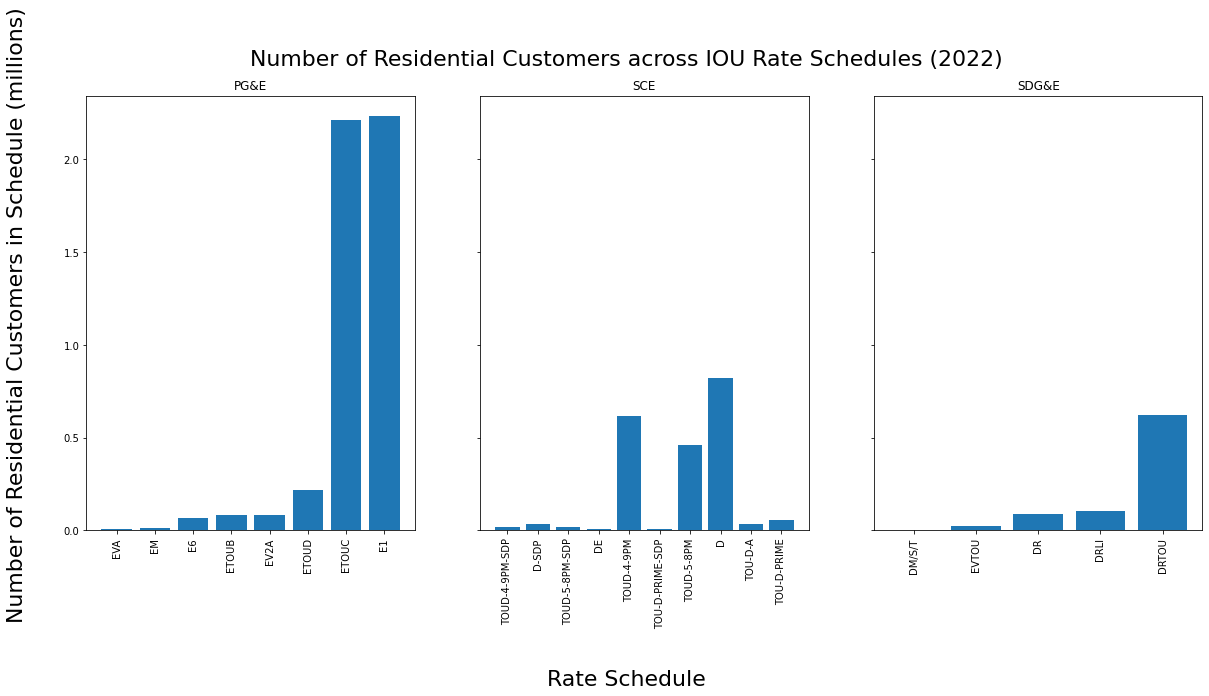

In [215]:
dfs = [PGE_res,SCE_res,SDGE_res]
df_names=["PG&E","SCE","SDG&E"]

fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(20,8),sharey=True,facecolor=None)
for idx,df in enumerate(dfs):
    bars = axs[idx].bar(x=df['rate_schedule'],height=df['avg_customers_per_month']/1e6)
    #axs[idx].yaxis.set_major_formatter(mtick.PercentFormatter())
    #axs[idx].bar_label(axs[idx].containers[0],fmt='{:.0%}',fontsize=10)
    axs[idx].tick_params(axis='x', labelrotation=90)
    axs[idx].set_title(df_names[idx])
fig.supylabel('Number of Residential Customers in Schedule (millions)',fontsize=22,x=0.07)
fig.supxlabel('Rate Schedule',fontsize=22,y=-0.15)
fig.suptitle('Number of Residential Customers across IOU Rate Schedules (2022)',fontsize=22,y=0.96)
fig.savefig('Number of Residential Customers across IOU Rate Schedules (2022).png',facecolor='w',dpi=600,bbox_inches='tight')

In [218]:
SCE_res

,rowid,utility_id_ferc1,utility_id_ferc1_label,utility_id_pudl,utility_id_pudl_label,utility_name_ferc1,report_year,rate_schedule_type,billing_status,rate_schedule_description,...,dollar_value,avg_customers_per_month,kwh_per_customer,revenue_per_kwh,record_id,rate_schedule,CCA_or_bundled,NEM_option,sep,pct of total
1078,270974,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,residential,billed,TOUD-4-9PM-SDP/CCA,...,5.327821e+06,4582.0,7042.339844,0.1651,sales_of_electricity_by_rate_schedules_account...,TOUD-4-9PM-SDP,CCA,None,None,0.000877
1247,271143,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,residential,billed,D-CARE-SDP/CCA,...,3.146752e+06,4699.0,7776.122559,0.0861,sales_of_electricity_by_rate_schedules_account...,D-SDP,CCA,None,None,0.000899
755,270651,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,residential,billed,TOUD-5-8PM-SDP/CCA,...,6.626696e+06,4826.0,7962.909180,0.1724,sales_of_electricity_by_rate_schedules_account...,TOUD-5-8PM-SDP,CCA,None,None,0.000923
1372,271268,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,residential,billed,DE/BUND,...,9.068453e+06,4983.0,8533.011719,0.2133,sales_of_electricity_by_rate_schedules_account...,DE,BUND,None,None,0.000953
1239,271135,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,residential,billed,D-SDP/BUND/NEM1.0,...,5.254190e+06,5298.0,4225.556641,0.2347,sales_of_electricity_by_rate_schedules_account...,D-SDP,BUND,NEM1.0,None,0.001014
1106,271002,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,residential,billed,TOUD-4-9PM/BUND/NEMPS2.0,...,3.498755e+06,5507.0,1725.985107,0.3681,sales_of_electricity_by_rate_schedules_account...,TOUD-4-9PM,BUND,NEMPS2.0,None,0.001054
350,270246,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,residential,billed,TOU-D-PRIME-SDP/BUND,...,1.738130e+07,5629.0,12223.840820,0.2526,sales_of_electricity_by_rate_schedules_account...,TOU-D-PRIME-SDP,BUND,None,None,0.001077
901,270797,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,residential,billed,TOUD-5-8PM/BUND/SEP,...,1.372700e+07,5762.0,8018.916992,0.2971,sales_of_electricity_by_rate_schedules_account...,TOUD-5-8PM,BUND,SEP,None,0.001102
1280,271176,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,residential,billed,D-CARE/BUND/SEP,...,1.073026e+07,6205.0,8936.180664,0.1935,sales_of_electricity_by_rate_schedules_account...,D,BUND,SEP,None,0.001187
344,270240,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,residential,billed,TOU-D-A-CARE/BUND/NEM2.0,...,4.024330e+06,6327.0,4500.553223,0.1413,sales_of_electricity_by_rate_schedules_account...,TOU-D-A,BUND,NEM2.0,None,0.001211
